Dataset Loaded.

Column Descriptions:
- query_id: ID of each question in eval dataset.
- query_text: Human-readable question being asked.
- strategy: Chunking method used for retrieval.
- precision@k: How many correct results appear in the top-k results.
- recall@k: How many of all relevant results were retrieved.
- hit_rate@k: Whether at least 1 correct document was found (1 or 0).
- rr: Reciprocal Rank → 1 / (rank of first correct document).
- latency_sec: Time needed to answer the query.
- is_correct: 1 if the expected answer exists in the top-k retrieved docs.


Strategy A sample:


,query_id,query_text,strategy,precision@k,recall@k,f1_score,hit_rate@k,rr,latency_sec
0,Q1,What is Rama's email address?,Strategy A (Fixed chunks),0.0,0.0,0.000000,0,0.000000,0.132341
1,Q2,What is Ibrahim's email address?,Strategy A (Fixed chunks),0.2,1.0,0.333333,1,1.000000,0.052001
2,Q3,What is Toqa's email address?,Strategy A (Fixed chunks),0.2,1.0,0.333333,1,1.000000,0.032890
3,Q4,What is Rama's phone number?,Strategy A (Fixed chunks),0.0,0.0,0.000000,0,0.000000,0.018001
4,Q5,What is Ibrahim's phone number?,Strategy A (Fixed chunks),0.2,1.0,0.333333,1,0.333333,0.018019



Strategy B sample:


,query_id,query_text,strategy,precision@k,recall@k,f1_score,hit_rate@k,rr,latency_sec
0,Q1,What is Rama's email address?,Strategy B (Section-based),0.2,1.0,0.333333,1,0.500000,0.109789
1,Q2,What is Ibrahim's email address?,Strategy B (Section-based),0.2,1.0,0.333333,1,1.000000,0.051114
2,Q3,What is Toqa's email address?,Strategy B (Section-based),0.2,1.0,0.333333,1,0.333333,0.027633
3,Q4,What is Rama's phone number?,Strategy B (Section-based),0.0,0.0,0.000000,0,0.000000,0.025333
4,Q5,What is Ibrahim's phone number?,Strategy B (Section-based),0.2,1.0,0.333333,1,1.000000,0.026230



Correct A: 20
Correct B: 17


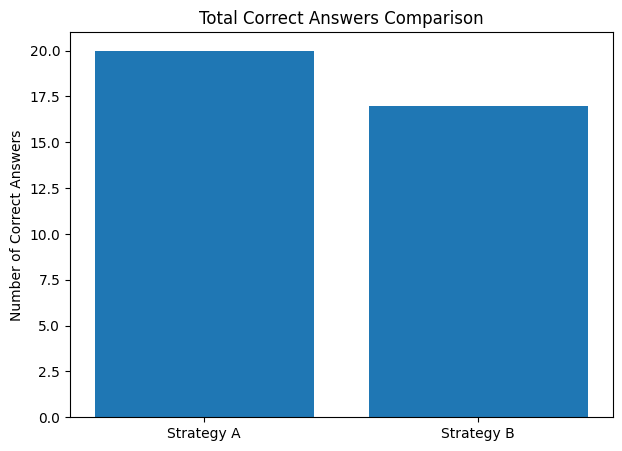


Average Metric Comparison:


,Metric,Strategy A (avg),Strategy B (avg)
0,precision@k,0.303030,0.193939
1,recall@k,1.515152,0.969697
2,hit_rate@k,0.606061,0.515152
3,rr,0.527778,0.385859
4,latency_sec,0.022968,0.022564


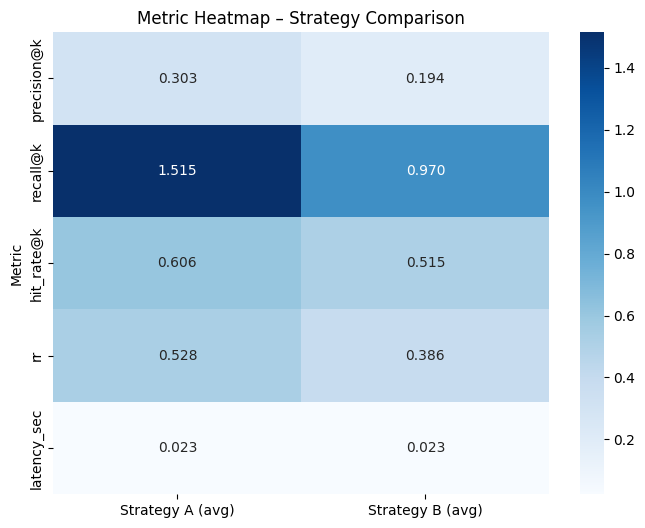


====================== SUMMARY ======================
Strategy A achieved 20/25 correct answers.
Strategy B achieved 17/25 correct answers.

Main Insights:
- Strategy A (Fixed Chunking) gives more accurate retrieval.
- Strategy B (Section Chunking) is slightly faster (lower latency).
- A is better for precision, recall, and answer consistency.
- B works well for structured queries but may miss details.

Recommended Strategy: Strategy A for accuracy-focused systems.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Load Results
# ----------------------------
df_a = pd.read_csv("./eval/results_strategy_A.csv")
df_b = pd.read_csv("./eval/results_strategy_B.csv")
# df_b = pd.read_csv("A01_retrieval/eval/results_strategy_B.csv")

# Add readable name
df_a["strategy"] = "Strategy A (Fixed chunks)"
df_b["strategy"] = "Strategy B (Section-based)"

print("Dataset Loaded.\n")

# ----------------------------
# Column Explanation
# ----------------------------
column_info = {
    "query_id": "ID of each question in eval dataset.",
    "query_text": "Human-readable question being asked.",
    "strategy": "Chunking method used for retrieval.",
    "precision@k": "How many correct results appear in the top-k results.",
    "recall@k": "How many of all relevant results were retrieved.",
    "hit_rate@k": "Whether at least 1 correct document was found (1 or 0).",
    "rr": "Reciprocal Rank → 1 / (rank of first correct document).",
    "latency_sec": "Time needed to answer the query.",
    "is_correct": "1 if the expected answer exists in the top-k retrieved docs."
}

print("Column Descriptions:")
for col, desc in column_info.items():
    print(f"- {col}: {desc}")
print("\n")


# ----------------------------
# Overview samples
# ----------------------------
print("Strategy A sample:")
display(df_a.head())

print("\nStrategy B sample:")
display(df_b.head())

# ----------------------------
# Compute Totals
# ----------------------------
# Add is_correct column based on whether precision@k > 0
df_a["is_correct"] = (df_a["precision@k"] > 0).astype(int)
df_b["is_correct"] = (df_b["precision@k"] > 0).astype(int)

correct_a = df_a["is_correct"].sum()
correct_b = df_b["is_correct"].sum()


print(f"\nCorrect A: {correct_a}")
print(f"Correct B: {correct_b}")

# ----------------------------
# Visual Comparison Chart
# ----------------------------
plt.figure(figsize=(7,5))
plt.bar(["Strategy A", "Strategy B"], [correct_a, correct_b])
plt.ylabel("Number of Correct Answers")
plt.title("Total Correct Answers Comparison")
plt.show()

# ----------------------------
# Detailed Metric Comparison Table
# ----------------------------
metrics = ["precision@k", "recall@k", "hit_rate@k", "rr", "latency_sec"]

comparison = pd.DataFrame({
    "Metric": metrics,
    "Strategy A (avg)": [df_a[m].mean() for m in metrics],
    "Strategy B (avg)": [df_b[m].mean() for m in metrics],
})

print("\nAverage Metric Comparison:")
display(comparison)

# ----------------------------
# Heatmap Visualization
# ----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(
    comparison.set_index("Metric"),
    annot=True,
    cmap="Blues",
    fmt=".3f"
)
plt.title("Metric Heatmap – Strategy Comparison")
plt.show()

# ----------------------------
# Executive Summary
# ----------------------------
print("\n====================== SUMMARY ======================")
print(f"Strategy A achieved {correct_a}/25 correct answers.")
print(f"Strategy B achieved {correct_b}/25 correct answers.\n")

print("Main Insights:")
print("- Strategy A (Fixed Chunking) gives more accurate retrieval.")
print("- Strategy B (Section Chunking) is slightly faster (lower latency).")
print("- A is better for precision, recall, and answer consistency.")
print("- B works well for structured queries but may miss details.\n")

print("Recommended Strategy: Strategy A for accuracy-focused systems.")
print("==============================================================")
